In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/awesome/Downloads/Data Analysis/HPD/HPD.csv', parse_dates = ['Occurrence\nDate'])

In [3]:
df.columns = df.columns.str.replace('\n',' ')
list(df.columns)

['Incident',
 'Occurrence Date',
 'Occurrence Hour',
 'NIBRS Class',
 'NIBRSDescription',
 'Offense Count',
 'Beat',
 'Premise',
 'Block Range',
 'StreetName',
 'Street Type',
 'Suffix',
 'ZIP Code']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218428 entries, 0 to 218427
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Incident          218428 non-null  int64         
 1   Occurrence Date   218428 non-null  datetime64[ns]
 2   Occurrence Hour   218428 non-null  int64         
 3   NIBRS Class       218428 non-null  object        
 4   NIBRSDescription  218428 non-null  object        
 5   Offense Count     218428 non-null  int64         
 6   Beat              218307 non-null  object        
 7   Premise           218428 non-null  object        
 8   Block Range       218428 non-null  int64         
 9   StreetName        218428 non-null  object        
 10  Street Type       200763 non-null  object        
 11  Suffix            30456 non-null   object        
 12  ZIP Code          215724 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 21.

In [5]:
df.shape

(218428, 13)

In [6]:
df.rename(columns={'Occurrence Date':'Date','Occurrence Hour':'Hour', 'NIBRSDescription':'Description'}, inplace=True)

In [7]:
df.sample(5)

,Incident,Date,Hour,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code
168896,133282319,2019-10-10,23,13A,Aggravated Assault,1,5F30,"Hotel, Motel, ETC",14255,NORTHWEST,FWY,NaN,77040
174049,137540119,2019-10-19,16,13B,Simple assault,1,3B50,"Residence, Home (Includes Apartment)",7900,BAUMAN,RD,NaN,77022
107278,84586519,2019-07-03,11,13A,Aggravated Assault,1,9C10,"Highway, Road, Street, Alley",10100,EAST,FWY,NaN,77029
9939,8263319,2019-01-19,2,23F,Theft from motor vehicle,1,1A20,"Highway, Road, Street, Alley",200,GRAY,ST,NaN,77002
177524,140285719,2019-10-25,0,26F,Identify theft,1,10H70,"Residence, Home (Includes Apartment)",7111,ARDMORE,ST,NaN,77021


In [8]:
df['Month'] = df['Date'].dt.month
column_move1 = df['Month']
df.drop(labels=['Month'], axis=1, inplace=True)
df.insert(2,'Month', column_move1)

df['Day'] = df['Date'].dt.day
column_move2 = df['Day']
df.drop(labels=['Day'], axis=1, inplace=True)
df.insert(3,'Day', column_move2)

df['Day_of_Week'] = df['Date'].dt.day_name()
column_move3 = df['Day_of_Week']
df.drop(labels=['Day_of_Week'], axis=1, inplace=True)
df.insert(4,'Day_of_Week', column_move3)

df['week_of_year'] = df['Date'].apply(lambda x: x.weekofyear)
column_move4 = df['week_of_year']
df.drop(labels=['week_of_year'], axis=1, inplace=True)
df.insert(5,'week_of_year', column_move4)

df['day_of_year'] = df['Date'].apply(lambda x: x.dayofyear)
column_move5 = df['day_of_year']
df.drop(labels=['day_of_year'], axis=1, inplace=True)
df.insert(6,'day_of_year', column_move5)

In [9]:
df.sample(5)

,Incident,Date,Month,Day,Day_of_Week,week_of_year,day_of_year,Hour,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code
132678,104232319,2019-08-12,8,12,Monday,33,224,18,240,Motor vehicle theft,1,10H40,"Other, Unknown",2403,CAROLINE,ST,NaN,77004
31887,25787019,2019-02-27,2,27,Wednesday,9,58,21,23F,Theft from motor vehicle,1,10H60,"Parking Lot, Garage",3200,MACGREGOR,WAY,N,77004
57024,45984219,2019-04-12,4,12,Friday,15,102,22,23F,Theft from motor vehicle,1,2A30,"Highway, Road, Street, Alley",800,BEVERLY,ST,NaN,77007
75715,63158619,2019-05-13,5,13,Monday,20,133,13,23G,Theft of motor vehicle parts or accessory,1,15E40,"Other, Unknown",3502,CLEARVIEW,CIR,NaN,77054
89920,70993419,2019-06-04,6,4,Tuesday,23,155,22,23F,Theft from motor vehicle,1,7C20,"Residence, Home (Includes Apartment)",4809,LAVENDER,ST,NaN,77026


# How many incidents are happening each day?

In [10]:
df['Date'].value_counts().describe()

count    365.000000
mean     598.432877
std       50.814076
min      449.000000
25%      566.000000
50%      600.000000
75%      634.000000
max      765.000000
Name: Date, dtype: float64

In [11]:
df['Date'].value_counts()[:10]

2019-05-01    765
2019-07-01    764
2019-06-01    723
2019-08-01    708
2019-11-01    705
2019-12-06    704
2019-11-22    704
2019-04-29    695
2019-05-15    691
2019-06-08    690
Name: Date, dtype: int64

In [12]:
##On average there are about 598 reported incidents with decent spread of data due to a small standard deviation.

In [13]:
df_count = df.groupby(['Date'])['Date'].agg(['count']).sort_values(by='Date').reset_index()
q1 = df_count['count'].quantile(0.25)
q3 = df_count['count'].quantile(0.75)
iqr = q3 -q1
l_limit = q1 -1.5*iqr
u_limit = q3 + 1.5*iqr
df_count[(df_count['count'] < l_limit) | (df_count['count'] > u_limit)]

,Date,count
63,2019-03-05,456
110,2019-04-21,449
120,2019-05-01,765
181,2019-07-01,764
331,2019-11-28,456


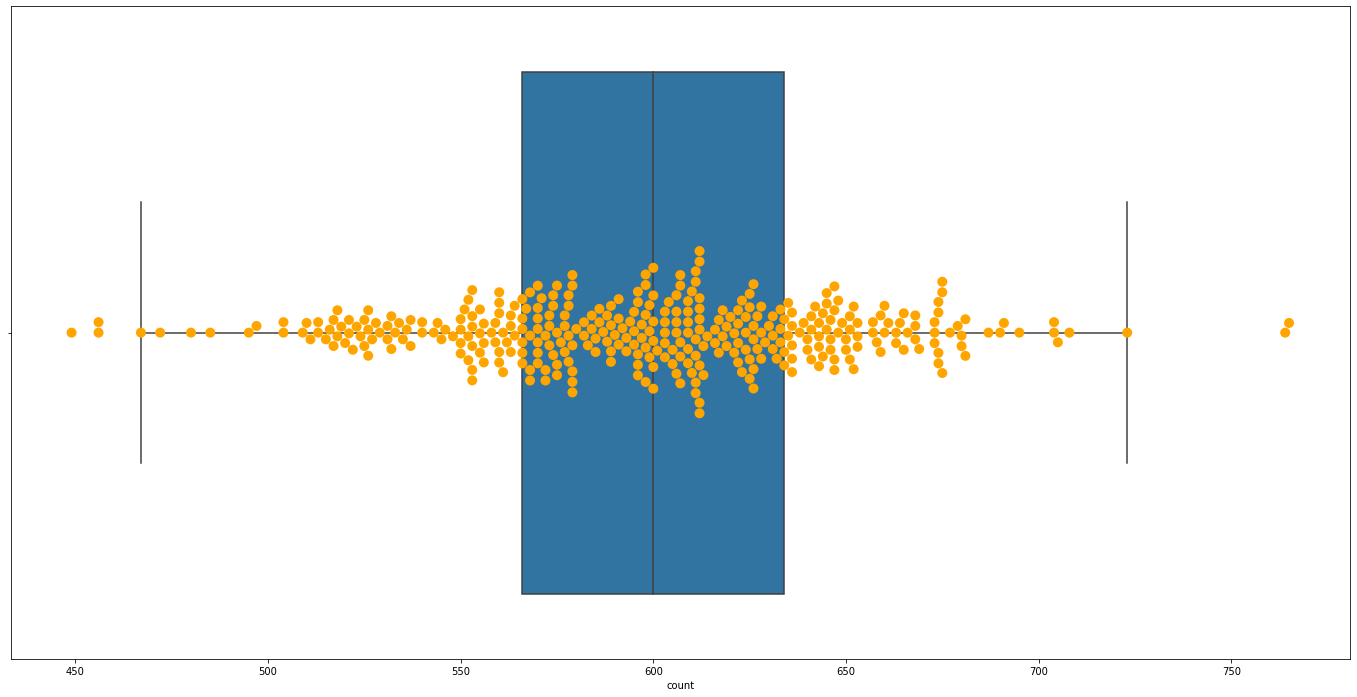

In [14]:
plt.figure(figsize=(24,12))
sns.boxplot(x='count', data=df_count, showfliers=False)
sns.swarmplot(x='count', data=df_count, color="orange", s=10)
plt.show()

## What are the top 10 most reported incidents?

In [15]:
def count_per(data):
    Total = df['Description'].value_counts()[:10]
    Percentage = df['Description'].value_counts(normalize=True)[:10]
    
    return pd.concat([Total,Percentage], axis=1, keys = ['Total', 'Percent'])
count_per(df)

,Total,Percent
Theft from motor vehicle,33062,0.151363
Simple assault,27138,0.124242
"Destruction, damage, vandalism",21617,0.098966
All other larceny,18440,0.084421
"Burglary, Breaking and Entering",16879,0.077275
Intimidation,14135,0.064712
Motor vehicle theft,13075,0.059860
Aggravated Assault,12652,0.057923
Shoplifting,10788,0.049389
Robbery,9195,0.042096


In [16]:
df[df['Description']=='Theft from motor vehicle'].groupby(['Date'])['Date'].agg(['count']).mean()

count    90.580822
dtype: float64

In [17]:
df[df['Description']=='Simple assault'].groupby(['Date'])['Date'].agg(['count']).mean()

count    74.350685
dtype: float64

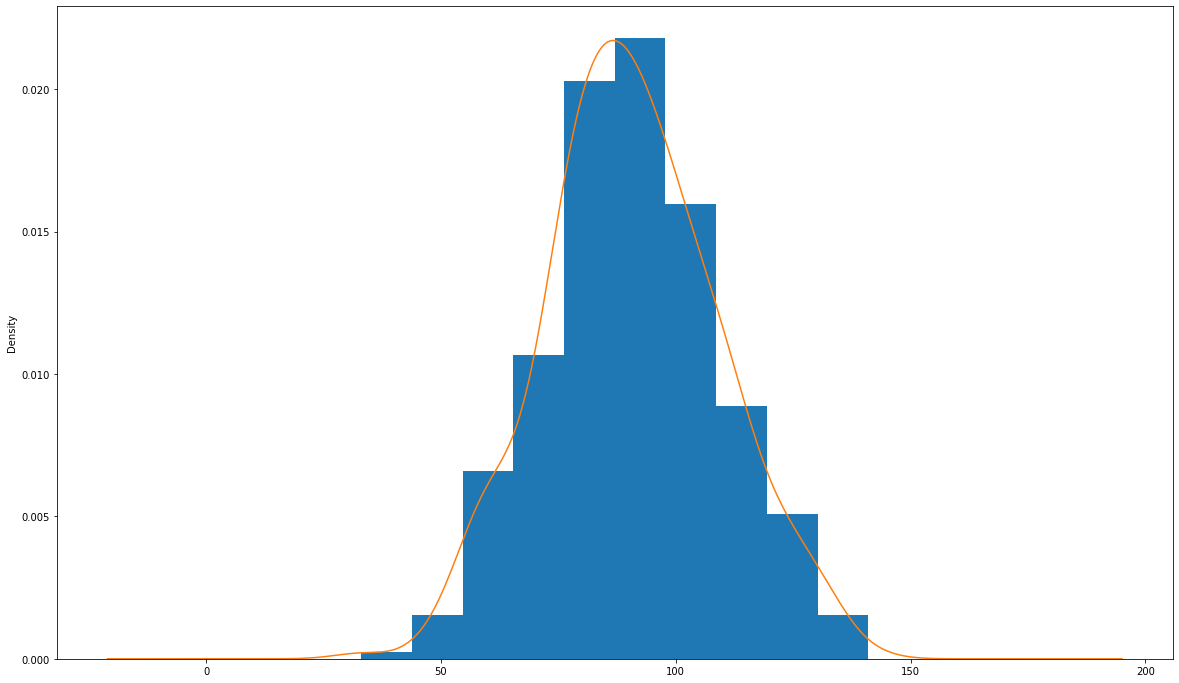

In [18]:
fig, ax = plt.subplots(figsize=(20,12))
ax = df[df['Description']=='Theft from motor vehicle'].groupby(['Date'])['Date'].count().plot(kind='hist', density=True)
ax1 = df[df['Description']=='Theft from motor vehicle'].groupby(['Date'])['Date'].count().plot(kind='kde')
plt.show()

In [19]:
##Theft from motor vehicle is the most reported incident and an average of over 90 reports a day.
## Thats about 22% more than simple assault.

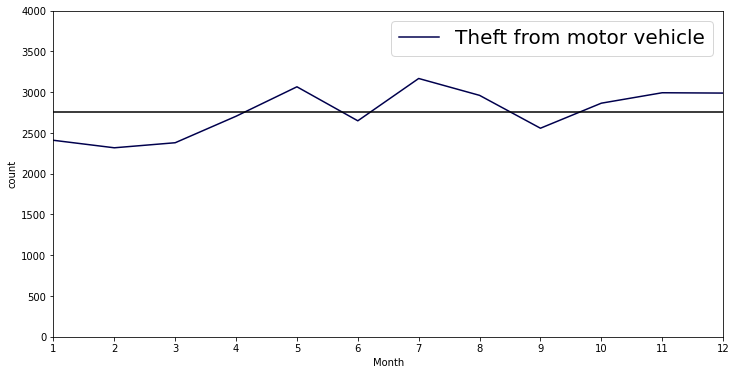

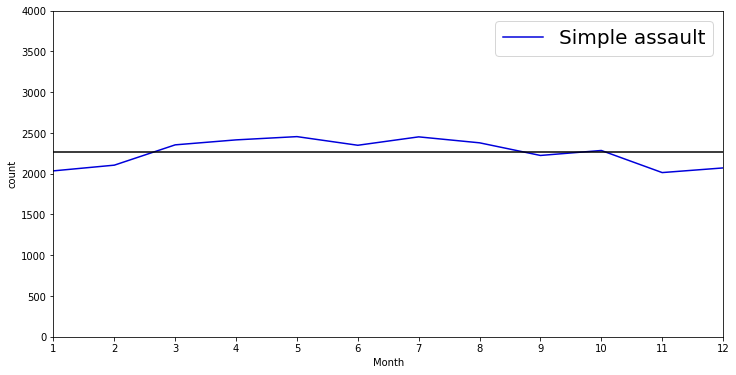

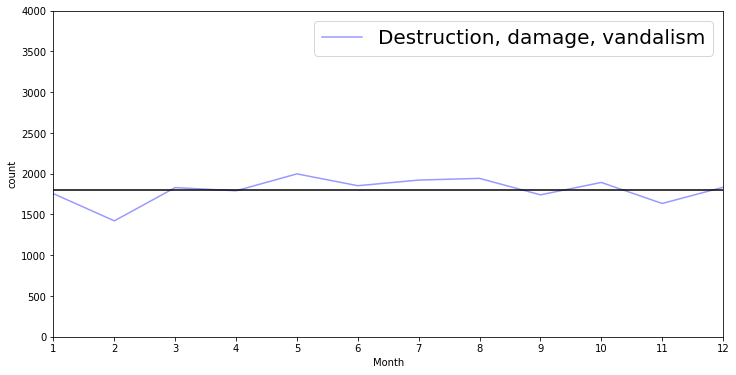

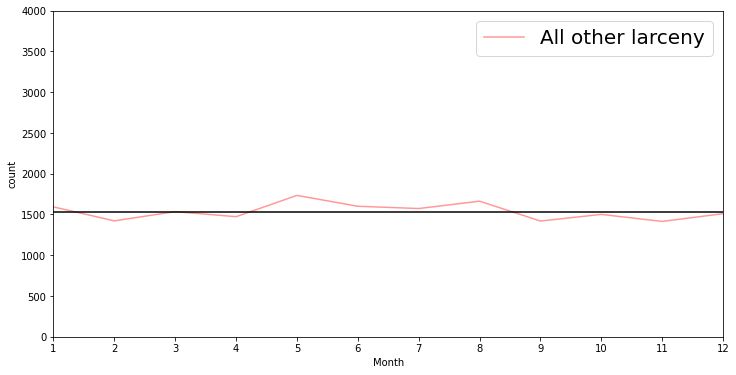

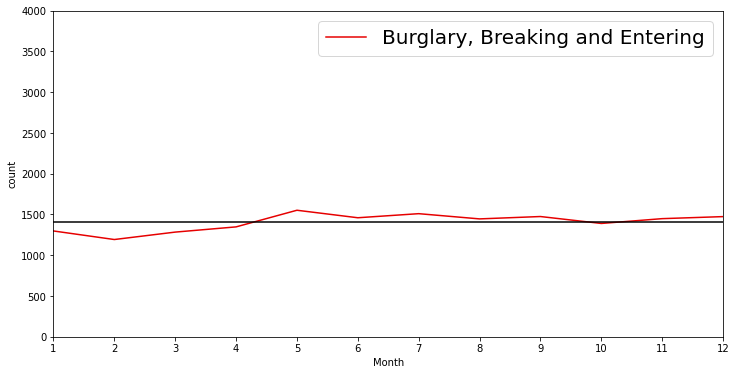

In [20]:
d = [x for x in df['Description'].value_counts()[:5].index]
for y in range(0,5):
    cmap = plt.get_cmap("seismic", len(d)+1)
    data = df[df['Description']==d[y]].groupby(['Month'])['Month'].agg(['count'])
    fig, ax = plt.subplots(figsize=(12,6), subplot_kw={'ylim': (0,4000)})
    ax = sns.lineplot(data=data, x="Month", y="count", label = d[y], color = cmap(y))
    mean = data['count'].mean()
    ax.axhline(mean, color='black')
    plt.xticks(range(1,13))
    plt.margins(0)
    plt.legend(loc='best', prop={'size':20})
    plt.show()

# What type of locations are these incidents happening mostly at?

In [21]:
def count_per(data):
    Total = df['Premise'].value_counts()[:10]
    Percentage = df['Premise'].value_counts(normalize=True)[:10]
    
    return pd.concat([Total,Percentage], axis=1, keys = ['Total', 'Percent'])
count_per(df)

,Total,Percent
"Residence, Home (Includes Apartment)",81140,0.371473
"Parking Lot, Garage",42139,0.192919
"Highway, Road, Street, Alley",27743,0.127012
"Other, Unknown",9988,0.045727
"Department, Discount Store",7118,0.032587
Restaurant,6146,0.028137
"Commercial, Office Building",5678,0.025995
Convenience Store,5372,0.024594
"Service, Gas Station",4816,0.022048
"Hotel, Motel, ETC",4029,0.018445


In [22]:
##There are 2 times as more incidents happening in residental area than Parking Lot, Garage.
## 37% chance of an incident happening at residental area.

In [23]:
def count_per(data):
    Total = df[df['Description']=='Theft from motor vehicle']['Premise'].value_counts()[:10]
    Percentage = df[df['Description']=='Theft from motor vehicle']['Premise'].value_counts(normalize=True)[:10]
    Overall = Total/df.shape[0]
    
    return pd.concat([Total,Percentage, Overall], axis=1, keys = ['Total', 'Percent', 'Overall'])
count_per(df)

,Total,Percent,Overall
"Parking Lot, Garage",17675,0.534602,0.080919
"Residence, Home (Includes Apartment)",5573,0.168562,0.025514
"Highway, Road, Street, Alley",4537,0.137227,0.020771
Restaurant,1052,0.031819,0.004816
"Hotel, Motel, ETC",596,0.018027,0.002729
"Other, Unknown",584,0.017664,0.002674
Park/Playground,574,0.017361,0.002628
"Service, Gas Station",533,0.016121,0.002440
"Commercial, Office Building",314,0.009497,0.001438
"Bar, Nightclub",258,0.007804,0.001181


In [24]:
## There are over 3 times as more Theft from motor vehicle happening in Parking Lot, Garage than residental areas.
## Given the incident is Theft from motor vehicles, 53% are more likely to happen in Parking Lot, Garage.
## 8% of incidients overall

In [25]:
def count_per(data):
    Total = df[df['Description']=='Simple assault']['Premise'].value_counts()[:10]
    Percentage = df[df['Description']=='Simple assault']['Premise'].value_counts(normalize=True)[:10]
    Overall = Total/df.shape[0]
    
    return pd.concat([Total,Percentage, Overall], axis=1, keys = ['Total', 'Percent', 'Overall'])
count_per(df)

,Total,Percent,Overall
"Residence, Home (Includes Apartment)",16760,0.617584,0.076730
"Highway, Road, Street, Alley",2918,0.107525,0.013359
"Parking Lot, Garage",2047,0.075429,0.009372
"Bar, Nightclub",667,0.024578,0.003054
"Hotel, Motel, ETC",663,0.024431,0.003035
"Other, Unknown",551,0.020304,0.002523
Restaurant,537,0.019788,0.002458
Convenience Store,469,0.017282,0.002147
"Service, Gas Station",424,0.015624,0.001941
"Drug Store, Doctors Office, Hospital",332,0.012234,0.001520


In [26]:
## Compared with other locations, 8 times more likely to get assaulted in a residental area than a parking lot, garage.
## Given an incident is Simple assault, 61% are more likely to happen in a residental area.
##8 % overall

In [27]:
def count_per(data):
    Total = df[df['Premise']=='Residence, Home (Includes Apartment)']['Description'].value_counts()[:10]
    Percentage = df[df['Premise']=='Residence, Home (Includes Apartment)']['Description'].value_counts(normalize=True)[:10]
    Overall = Total/len(df)
    
    return pd.concat([Total,Percentage, Overall], axis=1, keys = ['Total', 'Percent', 'Overall'])
count_per(df)

,Total,Percent,Overall
Simple assault,16760,0.206557,0.076730
"Burglary, Breaking and Entering",10563,0.130182,0.048359
"Destruction, damage, vandalism",10009,0.123355,0.045823
Intimidation,8472,0.104412,0.038786
All other larceny,7265,0.089537,0.033260
Aggravated Assault,6856,0.084496,0.031388
Theft from motor vehicle,5573,0.068684,0.025514
Motor vehicle theft,2887,0.035580,0.013217
Robbery,1826,0.022504,0.008360
Theft of motor vehicle parts or accessory,1594,0.019645,0.007298


In [28]:
##Given the location is a residental area, 21% are mor elikely to be simple assault.
## 8% chance overall

In [29]:
def count_per(data):
    Total = df[df['Premise']=='Parking Lot, Garage']['Description'].value_counts()[:10]
    Percentage = df[df['Premise']=='Parking Lot, Garage']['Description'].value_counts(normalize=True)[:10]
    Overall = Total/len(df)
    
    return pd.concat([Total,Percentage, Overall], axis=1, keys = ['Total', 'Percent', 'Overall'])
count_per(df)

,Total,Percent,Overall
Theft from motor vehicle,17675,0.419445,0.080919
Motor vehicle theft,5966,0.141579,0.027313
"Destruction, damage, vandalism",4832,0.114668,0.022122
Theft of motor vehicle parts or accessory,3016,0.071573,0.013808
Simple assault,2047,0.048577,0.009372
All other larceny,2006,0.047604,0.009184
Robbery,1989,0.047201,0.009106
Aggravated Assault,1301,0.030874,0.005956
"Drug, narcotic violations",852,0.020219,0.003901
Intimidation,715,0.016968,0.003273


In [30]:
##Given the location is a Parking Lot or garage, there is a 42% chance of a Theft from motor vehicle
## 8% chance overall

# Seasonal Trends

In [24]:
def seasons(df):
  if (df['Month'] == 12) | (df['Month'] >=1) & (df['Month'] <=2):
    return 'Winter'
  elif (df['Month'] >=3) & (df['Month'] <=5):
    return 'Spring'
  elif (df['Month'] >=6) & (df['Month'] <=8):
    return 'Summer'        
  else:
    return "Fall"
df['Season'] = df.apply(seasons, axis=1)

column_move6 = df['Season']
df.drop(labels=['Season'], axis=1, inplace=True)
df.insert(8,'Season', column_move6)

In [25]:
df.sample(1)

,Incident,Date,Month,Day,Day_of_Week,week_of_year,day_of_year,Hour,Season,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code
91386,72509619,2019-06-07,6,7,Friday,23,158,12,Summer,290,"Destruction, damage, vandalism",1,3B10,"Grocery, Supermarket",12009,NORTHWEST,FWY,NaN,77092


In [26]:
cats = ['Winter', 'Spring', 'Summer', 'Fall']
s_count = df.groupby(['Season'])['Incident'].agg(['count']).sort_values(by='Season').reindex(cats).reset_index()
s_count

,Season,count
0,Winter,51129
1,Spring,54994
2,Summer,57112
3,Fall,55193


In [27]:
s_mean = df['Season'].value_counts().mean()

In [28]:
print(s_mean)

54607.0


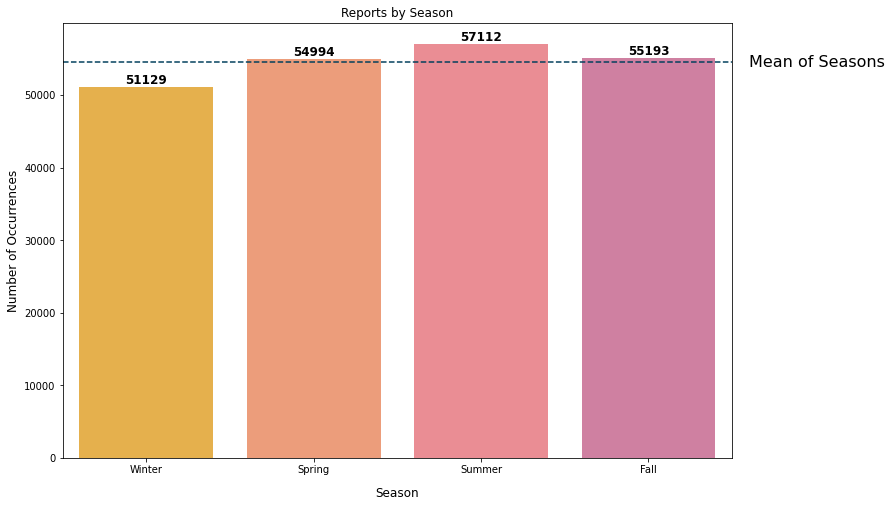

In [29]:
plt.figure(figsize=(12,8))
c = ['#ffa600', '#ff7c43', '#f95d6a', '#d45087', '#a05195', '#665191', '#2f4b7c']
ax = sns.barplot(x='Season', y='count', data= s_count, alpha=0.8, palette=c)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom', fontsize =12,
                    color= 'black', weight="bold")     
        
y_line_annotation = s_mean
ax.axhline(y=y_line_annotation, linestyle='dashed', color='#003f5c')
ax.text(3.6, 54607, 'Mean of Seasons', fontsize='16', va='center')


plt.title('Reports by Season')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Season', fontsize=12, labelpad=12)
plt.xticks(rotation=0)
plt.show()

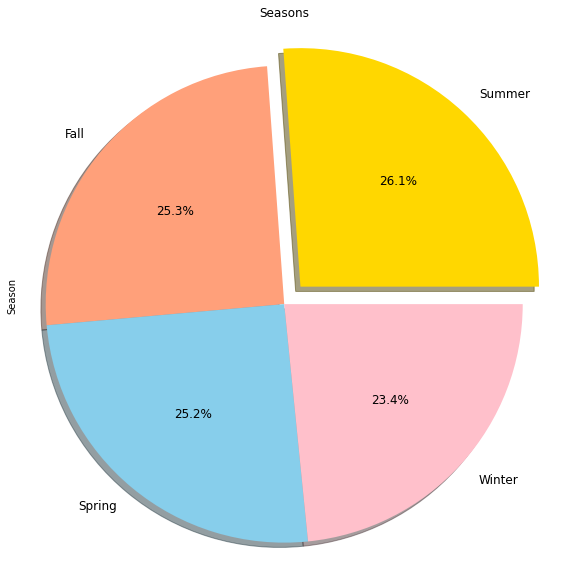

In [30]:
seasons_count = df['Season'].value_counts()
colors = ['gold','lightsalmon','skyblue','pink']
explode = (0.1, 0, 0, 0)
seasons_count.plot(kind = 'pie', title='Seasons', explode= explode, subplots=True,
                       autopct='%1.1f%%',shadow=True,figsize=(8,8), fontsize= 12, colors= colors)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [31]:
## Although not a huge difference, summer has the highest report incidents
## The difference between the summer and winter is only 3%

In [32]:
seasons = ['Winter', 'Spring', 'Summer', 'Fall'] 
for s in seasons:
    print(s.capitalize())
    all_s = df[df['Season']==s]['Description'].value_counts()[:5]
    print(all_s)
    print('\n')

Winter
Theft from motor vehicle           7717
Simple assault                     6211
Destruction, damage, vandalism     5011
All other larceny                  4525
Burglary, Breaking and Entering    3965
Name: Description, dtype: int64


Spring
Theft from motor vehicle           8151
Simple assault                     7224
Destruction, damage, vandalism     5619
All other larceny                  4742
Burglary, Breaking and Entering    4184
Name: Description, dtype: int64


Summer
Theft from motor vehicle           8778
Simple assault                     7180
Destruction, damage, vandalism     5718
All other larceny                  4837
Burglary, Breaking and Entering    4416
Name: Description, dtype: int64


Fall
Theft from motor vehicle           8416
Simple assault                     6523
Destruction, damage, vandalism     5269
All other larceny                  4336
Burglary, Breaking and Entering    4314
Name: Description, dtype: int64




In [33]:
fall = df[df['Season']=='Fall']['Description'].value_counts().to_frame()[:5]
spring = df[df['Season']=='Spring']['Description'].value_counts().to_frame()[:5]
summer = df[df['Season']=='Summer']['Description'].value_counts().to_frame()[:5]
winter = df[df['Season']=='Winter']['Description'].value_counts().to_frame()[:5]

In [34]:
fs = pd.merge(fall, spring, left_index=True, right_index=True)
fs

,Description_x,Description_y
Theft from motor vehicle,8416,8151
Simple assault,6523,7224
"Destruction, damage, vandalism",5269,5619
All other larceny,4336,4742
"Burglary, Breaking and Entering",4314,4184


In [35]:
sw = pd.merge(summer, winter, left_index=True, right_index=True)
sw

,Description_x,Description_y
Theft from motor vehicle,8778,7717
Simple assault,7180,6211
"Destruction, damage, vandalism",5718,5011
All other larceny,4837,4525
"Burglary, Breaking and Entering",4416,3965


In [36]:
fs.rename(columns={'Description_x':'Fall','Description_y':'Spring'}, inplace=True)
sw.rename(columns={'Description_x':'Summer','Description_y':'Winter'}, inplace=True)
all_seasons = pd.merge(fs, sw, left_index=True, right_index=True).T
all_seasons


,Theft from motor vehicle,Simple assault,"Destruction, damage, vandalism",All other larceny,"Burglary, Breaking and Entering"
Fall,8416,6523,5269,4336,4314
Spring,8151,7224,5619,4742,4184
Summer,8778,7180,5718,4837,4416
Winter,7717,6211,5011,4525,3965


In [37]:
i = [x for x in all_seasons.columns]
i

['Theft from motor vehicle',
 'Simple assault',
 'Destruction, damage, vandalism',
 'All other larceny',
 'Burglary, Breaking and Entering']

In [38]:
for x in i:
    print(x + ' with MAX in ' + all_seasons[x].idxmax() + ' and MIN in ' +  all_seasons[x].idxmin())
    season_difference = (all_seasons[x].max() - all_seasons[x].min())/ all_seasons[x].min() * 100
    print(season_difference)
    print('\n')

Theft from motor vehicle with MAX in Summer and MIN in Winter
13.74886613969159


Simple assault with MAX in Spring and MIN in Winter
16.30977298341652


Destruction, damage, vandalism with MAX in Summer and MIN in Winter
14.108960287367792


All other larceny with MAX in Summer and MIN in Fall
11.554428044280444


Burglary, Breaking and Entering with MAX in Summer and MIN in Winter
11.37452711223203




In [39]:
## The same top 5 incidents occur every season.
## Simple Assault has the largest increase of incidents from the min(Winter) and max(Summer) of 16%

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


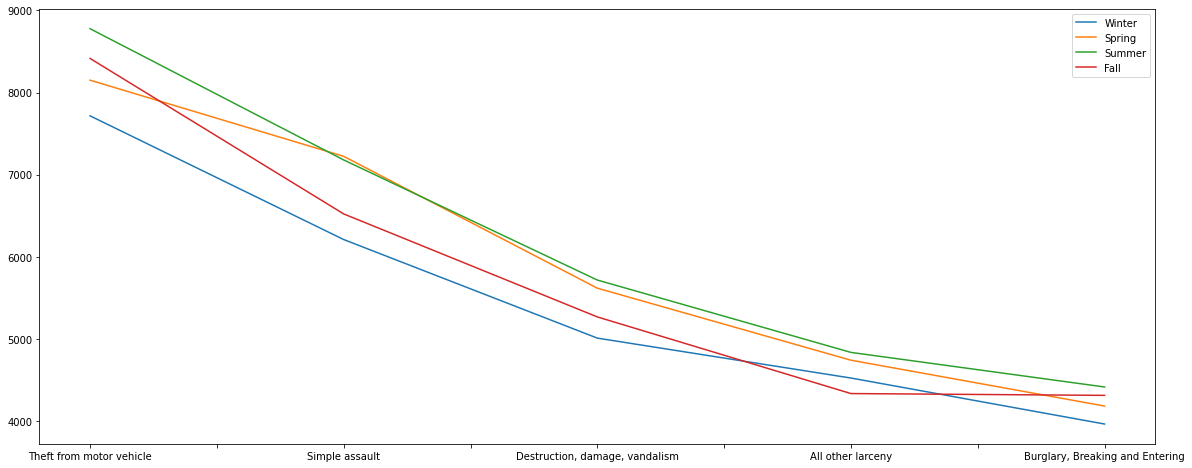

In [40]:
seasons = ['Winter', 'Spring', 'Summer', 'Fall'] 
for s in seasons:
    s_plot = df[df['Season']==s]['Description'].value_counts()[:5].plot(figsize=(20,8))
    plt.legend(seasons)
    print(s_plot)

In [78]:
##Summer may have more incidents occuring, however Spring has more Simple assault incidents occuring.

# Are incidents more likely to occur on weekdays or weekend?

In [41]:
df['Type_of_Day']=['Weekend' if x == "Saturday" or x =='Sunday' or x=='Friday' and y >=16 else 'Weekday' for (x,y) in zip(df['Day_of_Week'],df['Hour'])]

In [42]:
df['Type_of_Day'].value_counts()

Weekday    142784
Weekend     75644
Name: Type_of_Day, dtype: int64

In [43]:
print(df[df['Type_of_Day']=='Weekday']['Day_of_Week'].value_counts().mean())
print(df[df['Type_of_Day']=='Weekend']['Day_of_Week'].value_counts().mean())

28556.8
25214.666666666668


In [90]:
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
d_count = df.groupby(['Day_of_Week'])['Incident'].agg(['count']).sort_values(by='Day_of_Week').reindex(cats).reset_index()
d_count

,Day_of_Week,count
0,Sunday,29445
1,Monday,31425
2,Tuesday,31298
3,Wednesday,31237
4,Thursday,30635
5,Friday,32788
6,Saturday,31600


In [99]:
weekday_mean = df[df['Type_of_Day']=='Weekday']['Day_of_Week'].value_counts().mean()
weekday_mean

28556.8

In [100]:
weekend_mean = df[df['Type_of_Day']=='Weekend']['Day_of_Week'].value_counts().mean()
weekend_mean

25214.666666666668

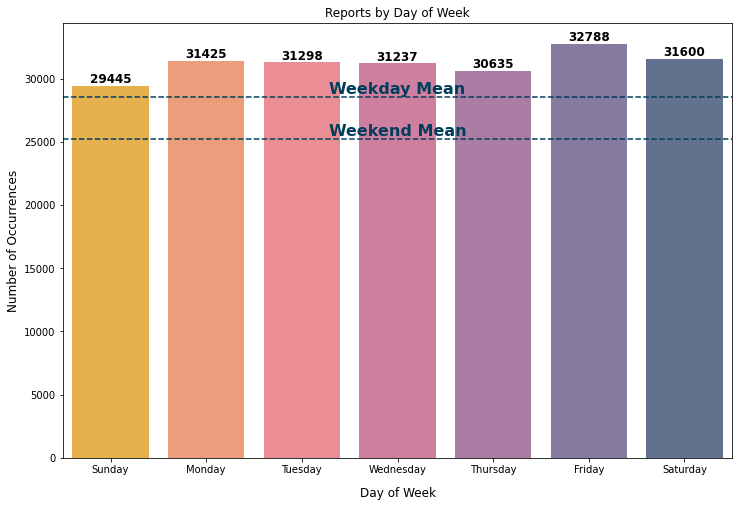

In [47]:
plt.figure(figsize=(12,8))
c = ['#ffa600', '#ff7c43', '#f95d6a', '#d45087', '#a05195', '#665191', '#2f4b7c']
ax = sns.barplot(x='Day_of_Week', y='count', data= d_count, alpha=0.8, palette=c)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom', fontsize =12,
                    color= 'black', weight="bold")     
        
y_line_annotation = weekday_mean
y_text_annotation =  weekday_mean + 250
ax.axhline(y=y_line_annotation, linestyle='dashed',color='#003f5c')
ax.text(y=y_text_annotation, x = 3, ha='center', s='Weekday Mean', color='#003f5c', fontsize=16, weight="bold")


y_line_annotation = weekend_mean
y_text_annotation = weekend_mean + 250
ax.axhline(y=y_line_annotation, linestyle='dashed', color='#003f5c')
ax.text(y=y_text_annotation, x = 3, ha='center', s='Weekend Mean', color='#003f5c', fontsize=16, weight="bold")

plt.title('Reports by Day of Week')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day of Week', fontsize=12, labelpad=12)
plt.xticks(rotation=0)
plt.show()

In [102]:
weekday_mean - weekend_mean

3342.1333333333314

In [ ]:
##According to the graph, on a weekday there is an average of over 28556 incidents reported.
##3342 lower than the average of over 25215 on weekends.

In [91]:
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
days = [df[df['Day_of_Week']==c]['Date'].value_counts().mean() for c in cats]
days

[566.25,
 604.3269230769231,
 590.5283018867924,
 600.7115384615385,
 589.1346153846154,
 630.5384615384615,
 607.6923076923077]

In [92]:
d_count = d_count.assign(days=days)
d_count.rename(columns={'days':'mean'}, inplace=True)
d_count

,Day_of_Week,count,mean
0,Sunday,29445,566.250000
1,Monday,31425,604.326923
2,Tuesday,31298,590.528302
3,Wednesday,31237,600.711538
4,Thursday,30635,589.134615
5,Friday,32788,630.538462
6,Saturday,31600,607.692308


In [87]:
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df2 = pd.DataFrame(pd.crosstab(index=df['Day_of_Week'], columns='percentage', normalize=True, dropna=True).sort_values(by='Day_of_Week').reindex(cats))
df2

col_0,percentage
Day_of_Week,
Sunday,0.134804
Monday,0.143869
Tuesday,0.143287
Wednesday,0.143008
Thursday,0.140252
Friday,0.150109
Saturday,0.144670


In [98]:
df3 = pd.merge(d_count, df2, left_on='Day_of_Week', right_on='Day_of_Week')
df3

,Day_of_Week,count,mean,percentage
0,Sunday,29445,566.250000,0.134804
1,Monday,31425,604.326923,0.143869
2,Tuesday,31298,590.528302,0.143287
3,Wednesday,31237,600.711538,0.143008
4,Thursday,30635,589.134615,0.140252
5,Friday,32788,630.538462,0.150109
6,Saturday,31600,607.692308,0.144670


# Why is Friday the highest?

In [106]:
friday = df[df['Day_of_Week']=='Friday'].groupby(['Hour'])['Incident'].agg(['count'])

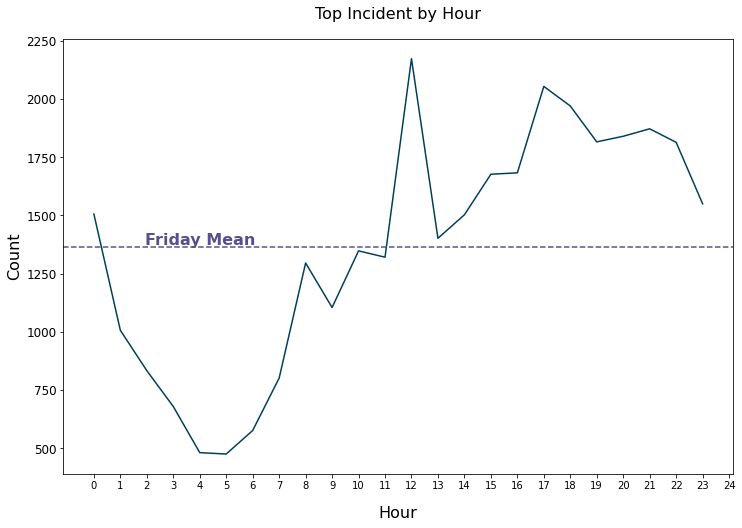

In [145]:
fig, ax = plt.subplots(figsize=(12,8))
ax= sns.lineplot(x="Hour", y="count", data=friday, color='#003f5c')
plt.title('Top Incident by Hour', fontsize=16, pad=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Hour', fontsize=16, labelpad=15)
plt.xticks(range(0,25))
plt.yticks(fontsize=12)

y_line_annotation = friday['count'].mean()
y_text_annotation = friday['count'].mean() + 10
ax.axhline(y=y_line_annotation, linestyle='dashed', color='#58508d')
ax.text(y=y_text_annotation, x = 4, ha='center', s='Friday Mean', color='#58508d', fontsize=16, weight="bold")

plt.show()

In [ ]:
##Incidents start low early in the morning and increase throughout the day, while decreasing after midnight.
##The lowest at 5am.
##The highest at 12pm. Lunchtime spike?

In [58]:
f_hour = df[df['Day_of_Week']=='Friday'].groupby(['Hour','Description'])['Description'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates(subset='Hour').sort_values(by='Hour', ascending=True)
f_hour

,Hour,Description,count
42,0,Simple assault,158
41,1,Simple assault,161
70,2,Simple assault,128
75,3,"Burglary, Breaking and Entering",127
120,4,"Burglary, Breaking and Entering",101
141,5,"Burglary, Breaking and Entering",94
110,6,"Burglary, Breaking and Entering",106
71,7,"Burglary, Breaking and Entering",128
65,8,All other larceny,131
56,9,Theft from motor vehicle,137


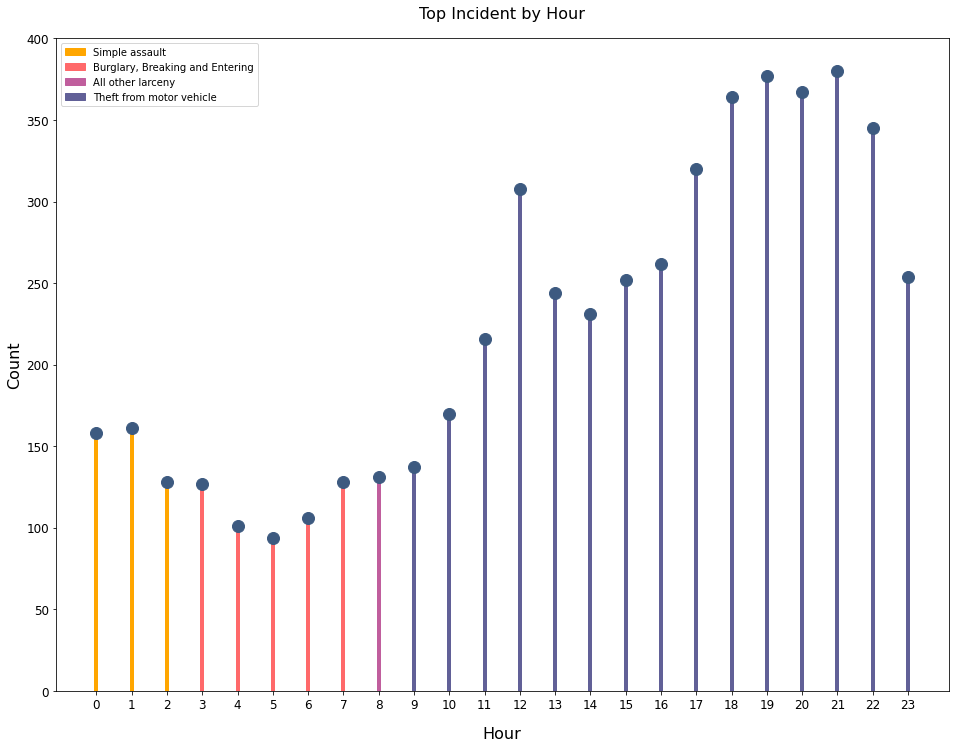

In [96]:
colors = {'Simple assault':'#ffa600', 'Burglary, Breaking and Entering':'#ff696a', 'All other larceny':'#c05e9d', 'Theft from motor vehicle':'#616097'}
fig, ax = plt.subplots(figsize=(16,12))
ax.vlines(f_hour['Hour'], ymin=0, ymax=f_hour['count'], color=f_hour['Description'].apply(lambda x: colors[x]), linewidth=4)
plt.legend(f_hour['Description'].apply(lambda x: colors[x]))
ax.plot(f_hour['Hour'], f_hour['count'], 'o', markersize= 12, color='#3d5a80')
plt.title('Top Incident by Hour', fontsize=16, pad=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Hour', fontsize=16, labelpad=15)
plt.xticks(f_hour['Hour'], fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.ylim(0, 400)
       
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

In [ ]:
##Again lowest point is early in the morning, steadly rising to late evening. Then once midnight hits, it decreases.

In [100]:
r_count = df[df['Day_of_Week']=='Friday'].groupby(['Hour','Premise'])['Premise'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates(subset='Hour').sort_values(by='Hour', ascending=True)
r_count

,Hour,Premise,count
4,0,"Residence, Home (Includes Apartment)",641
26,1,"Residence, Home (Includes Apartment)",352
31,2,"Residence, Home (Includes Apartment)",303
37,3,"Residence, Home (Includes Apartment)",251
48,4,"Residence, Home (Includes Apartment)",209
49,5,"Residence, Home (Includes Apartment)",193
36,6,"Residence, Home (Includes Apartment)",253
24,7,"Residence, Home (Includes Apartment)",364
12,8,"Residence, Home (Includes Apartment)",530
16,9,"Residence, Home (Includes Apartment)",453


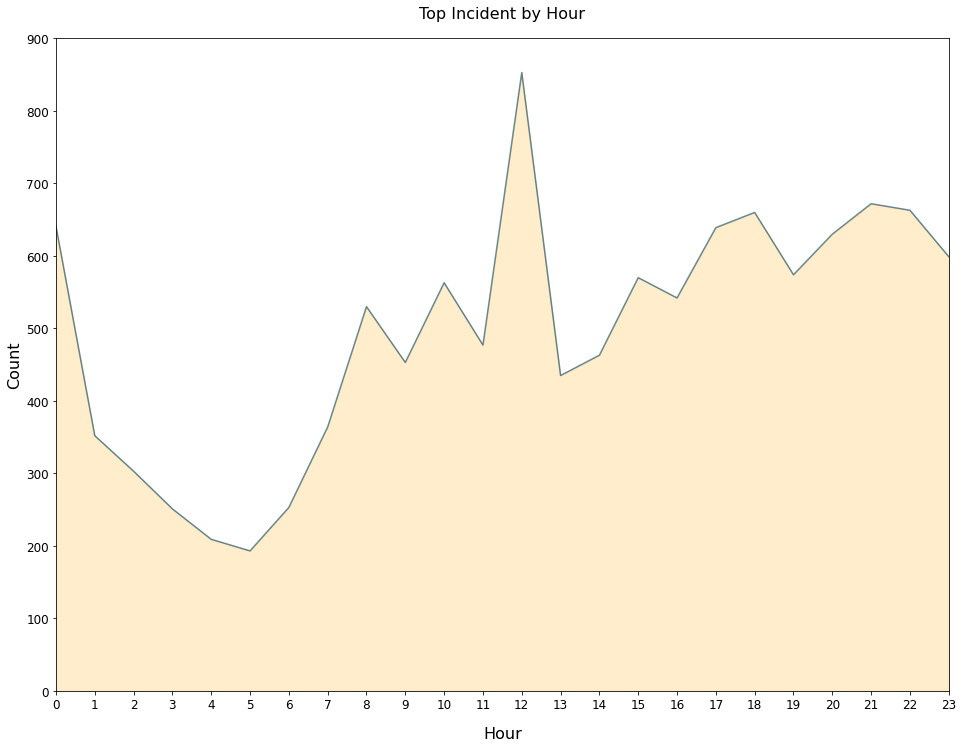

In [108]:
fig, ax = plt.subplots(figsize=(16,12))
plt.fill_between(r_count['Hour'], r_count['count'], color="#ffa600", alpha=0.2)
plt.plot(r_count['Hour'], r_count['count'], color="#003f5c", alpha=0.6)
plt.title('Top Incident by Hour', fontsize=16, pad=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Hour', fontsize=16, labelpad=15)
plt.xticks(f_hour['Hour'], fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.margins(0)
plt.ylim(0, 900)
plt.show()

In [ ]:
##The majority of incidents are happening at residental areas.